what would you like to know about Japan's economy?
Enter '1': for 'all items CPI'
Enter '2': for 'CPI excluding food and energy'
Enter '3': for 'expected price since 1982
Enter '4': for 'Real GDP'
Enter '5': for 'Suicide Rate'
Enter '6': for 'Total Consumption Index'
Enter '7': for 'Total Expected Inflation
Enter '8' to quit the program
Please enter an option from 1-7:1


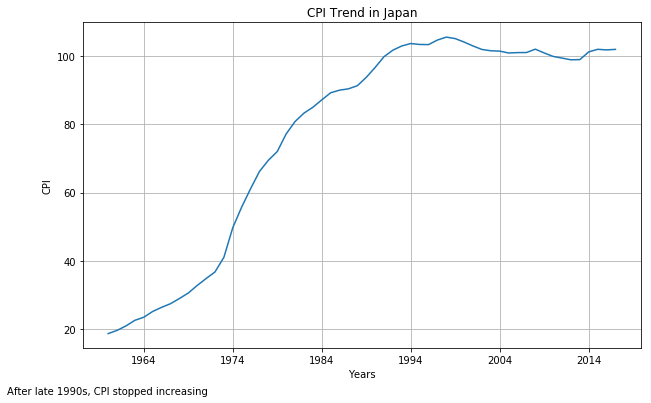

what would you like to know about Japan's economy?
Enter '1': for 'all items CPI'
Enter '2': for 'CPI excluding food and energy'
Enter '3': for 'expected price since 1982
Enter '4': for 'Real GDP'
Enter '5': for 'Suicide Rate'
Enter '6': for 'Total Consumption Index'
Enter '7': for 'Total Expected Inflation
Enter '8' to quit the program


In [ ]:
import collections
%matplotlib inline
from pylab import *
import matplotlib
import urllib.request
import collections
import re
import bs4
import time
import lxml

import os

from collections import defaultdict
import zipfile                                                                                                                                                                                          
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import xlrd
from bs4 import BeautifulSoup
import requests
import sys
class scrape():
    
    def __init__(self, zpath):
        
        self.dic = defaultdict(list)
        self.newlst = [] 
        if not os.path.exists(zpath):
            raise FileNotFoundError('file ' + zpath + " does not exist")
        if not zpath.endswith('.zip'):
            raise ValueError("file" + zpath + " is not a zip file")
 
        #reads all the files in the zipfile
        with zipfile.ZipFile(zpath) as zf:
            helpFiles = zf.namelist()
                   
                            
 
        #reads all the lines in a single file and stores them as a list
        for i in (helpFiles):
            if "xls" in i and "MACOSX" not in i:
                self.newlst.append(i)
            
    def scrapeDataExpectedPriceSince1982(self):
        tempLst = []
        tempNlst = []
        a=[]
        di = {}
        for i in (self.newlst):
            if i == 'Japan Econ/ExpectedPriceSince1982 .xls':
                workbook = xlrd.open_workbook(i)
                worksheet = workbook.sheet_by_name('82.6～04.3')
                for row in range(5, worksheet.nrows):
                    if isinstance((worksheet.cell_value(row, 0)), (int, float)):
                        if worksheet.cell_value(row, 2)==6:
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row, 2)])
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row+1, 2)])
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row+2, 2)])
                                tempNlst.append([worksheet.cell_value(row, 3), worksheet.cell_value(row, 4),
                                                 worksheet.cell_value(row, 5), worksheet.cell_value(row, 6),
                                                 worksheet.cell_value(row, 7)])
                                tempNlst.append([worksheet.cell_value(row+1, 3), worksheet.cell_value(row+1, 4),
                                                 worksheet.cell_value(row+1, 5), worksheet.cell_value(row+1, 6),
                                                 worksheet.cell_value(row+1, 7)])
                                    
                                tempNlst.append([worksheet.cell_value(row+2, 3), worksheet.cell_value(row+2, 4),
                                                 worksheet.cell_value(row+2, 5), worksheet.cell_value(row+2, 6),
                                                 worksheet.cell_value(row+2, 7)])
                        elif  worksheet.cell_value(row, 0)==2004:
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row, 2)])
                                tempNlst.append([worksheet.cell_value(row, 3), worksheet.cell_value(row, 4),
                                                 worksheet.cell_value(row, 5), worksheet.cell_value(row, 6),
                                                 worksheet.cell_value(row, 7)])
                        else :
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row, 2)])
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row+1, 2)])
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row+2, 2)])
                                tempLst.append([worksheet.cell_value(row, 0),worksheet.cell_value(row+3, 2)])
                                tempNlst.append([worksheet.cell_value(row, 3), worksheet.cell_value(row, 4),
                                                 worksheet.cell_value(row, 5), worksheet.cell_value(row, 6),
                                                 worksheet.cell_value(row, 7)])
                                tempNlst.append([worksheet.cell_value(row+1, 3), worksheet.cell_value(row+1, 4),
                                                 worksheet.cell_value(row+1, 5), worksheet.cell_value(row+1, 6),
                                                 worksheet.cell_value(row+1, 7)])
                                    
                                tempNlst.append([worksheet.cell_value(row+2, 3), worksheet.cell_value(row+2, 4),
                                                 worksheet.cell_value(row+2, 5), worksheet.cell_value(row+2, 6),
                                                 worksheet.cell_value(row+2, 7)])
                                tempNlst.append([worksheet.cell_value(row+3, 3), worksheet.cell_value(row+3, 4),
                                                 worksheet.cell_value(row+3, 5), worksheet.cell_value(row+3, 6),
                                                 worksheet.cell_value(row+3, 7)])
                                
        
        result = list(zip(tempLst, tempNlst))
        for z in range(len(tempLst)):
            a.append(tuple(tempLst[z]))
        
               
        for i in range(len(tempLst)) :
            di[a[i]]=tempNlst[i]
        
        return di
    
    def scrapeDataAllItemCPI(self):
        for i in (self.newlst):
            if i == 'Japan Econ/allitemCPI.xls':
                df = pd.read_excel(i)
        
        return df
        
    def scrapeDataCPIExcludeFoodEnergy(self):
        for i in (self.newlst):
            if i == 'Japan Econ/CPIexcludefoodenergy.xls':
                df = pd.read_excel(i)
        return df
    
    def scrapeSuicde(self):
        url = 'https://ja.wikipedia.org/wiki/日本の自殺'
        page_content = requests.get(url).content
        sp = BeautifulSoup(page_content, 'lxml')

        al=[td for td in sp.findAll("td")]
       
        i=0
        year=[]
        number=[]
        for a,b in enumerate(al):
    
   
            if a != None:
                d=1975+i
     
                if str(d) in b.text:
                    year.append(d)
                    number.append(al[a+1].text)
                    i=i+1
         

        numberInt=[]
        for i in number:
            if "," in i:
                removed = i.replace(",", "")
                numberInt.append(int(removed))
        
        return year, numberInt
        
 
    def scrapeDataGDP(self):
        lst1 = []
        lst2 = []
        lst3 = list(range(1994, 2017))
       
                
        lst4=[]
        lst5=[]
        tempLst = []
        tempNlst = []
        
        for i in (self.newlst):
            if i == 'Japan Econ/NominalGDPYearly .xls':
               
                workbook = xlrd.open_workbook(i)
                worksheet = workbook.sheet_by_name('実数')
                for row in range(1, worksheet.nrows):
                    if "参考）国内総生産（支出側）（除くFISIM" in worksheet.cell_value(row, 0):
                        for column in range(1, worksheet.ncols):
                            lst1.append(worksheet.cell_value(row, column))
                            
            if i == "Japan Econ/realGDP.xls":
             
                workbook = xlrd.open_workbook(i)
                worksheet = workbook.sheet_by_name('実数')
                for row in range(1, worksheet.nrows):
                    if "参考）国内総生産（支出側）（除くFISIM" in worksheet.cell_value(row, 0):
                        for column in range(1, worksheet.ncols):
                            lst2.append(worksheet.cell_value(row, column))
                
        for j in lst1:
            if isinstance(j, float):
                lst4.append(j)
        for k in lst2:
            if isinstance(k, float):
                lst5.append(k)
        
        return lst3, lst4, lst5
    
    def scrapeTotalExpectation(self):
        year=[]
        for t in range(4,13):
            year.append([2004, t])
        for i in range(2005,2018):
            for j in range(1,13):
                year.append([i,j])
        year.append([2018,1])
        year.append([2018,2])


        data=[]
        for i in (self.newlst):
            if i == 'Japan Econ/TotalExpectedInflation.xls':
                workbook = xlrd.open_workbook(i)
                worksheet = workbook.sheet_by_name('物価 Price（総世帯, all household )')
                for row in range(7, 174):
            #for i in range(0,8):
                    data.append([worksheet.cell_value(row, 4),worksheet.cell_value(row, 5),worksheet.cell_value(row, 6),
                                   worksheet.cell_value(row, 10),worksheet.cell_value(row, 13),worksheet.cell_value(row, 14),
                                   worksheet.cell_value(row, 15)])
        a=[]
        di={}
        result = list(zip(year, data))
        for z in range(len(year)):
            a.append(tuple(year[z]))
        
               
        for i in range(len(year)) :
            di[a[i]]=data[i]
        #print(di)
     
        return di
                        
        
    def graph(self, lst):
        if len(lst)==3 or len(lst)==4:
            x1=["nominal", lst[1]]
        
      
            x2=["real", lst[2]]
   
            plt.rcParams['figure.figsize'] = (10, 6)
            fig,ax = plt.subplots(1)
            fig,ax1 = plt.subplots(1)
            if x1[0]=="nominal":
                x=lst[0]
                y=x1[1]
                if len(lst)==3:
                    ax.set_xlabel("Years")
                    ax.set_ylabel("Nominal GDP")
                    ax.set_title("Nominal GDP in Japan")
                    figtext(.02, .02,"In last 20 years, there is almost zero nominal and real GDP growth in Japan")
                    ax.grid()
                    ax.plot(x, y)
                elif len(lst)==4:
                    ax.set_xlabel("Years")
                    ax.set_ylabel("Nominal Consumption Index")
                    ax.set_title("Nominal Consumption Index in Japan")
                   
                    ax.grid()
                    ax.plot(x, y)
            
            
            if x2[0]=="real":
                x=lst[0]
                y=x2[1]
                if len(lst)==3:
                    ax1.set_xlabel("Years")
                    ax1.set_ylabel("Real GDP")
                    
                    ax1.set_title("Real GDP in Japan")
                    figtext(.02, .02,"")
                    ax1.grid()
                    ax1.plot(x, y)
                elif len(lst)==4:
                    ax1.set_xlabel("Years")
                    ax1.set_ylabel("Real Consumption Index")
                    ax1.set_title("Real Consumption Index in Japan")
                    figtext(.02, .02,"")
                    ax1.grid()
                    ax1.plot(x, y)
                    
        elif len(lst)==2:
            x=lst[0]
            y=lst[1]
            plt.rcParams['figure.figsize'] = (10, 6)
            fig,ax = plt.subplots(1)
            fig.suptitle("Suicides per Year", fontsize = 14, fontweight = 'bold')
            ax.set_xlabel("Years")
            ax.set_ylabel("Total Number of Suicides")
            figtext(.02, .02, "From this graph we can see a big jump in the late 1990s in the number of suicides in Japan From this graph we can see a big jump in the late 1990s in the number of suicides in Japan")
            ax.grid()
            ax.plot(x, y)
            
        
        
            
        
                
    def graphData(self, df):
    
        x = df[df.dtypes.index[0]]
        y = df[df.dtypes.index[1]]
        
         
        plt.rcParams['figure.figsize'] = (10, 6)
        
        fig,ax = plt.subplots(1)
      
        if df.dtypes.index[1] == "JPNCPICORAINMEI":
            ax.set_xlabel("Years")
            ax.set_ylabel("CPI")
            ax.set_title("CPI Trend in Japan Excluding Food and Energy ")
            figtext(.02, .02,"After late 1990s, CPI stopped increasing")
            ax.grid()
            ax.plot(x, y)
            
        elif df.dtypes.index[1] == "CPALCY01JPA661N":
            ax.set_xlabel("Years")
            ax.set_ylabel("CPI")
            ax.set_title("CPI Trend in Japan")
            figtext(.02, .02,"After late 1990s, CPI stopped increasing")
            ax.grid()
            ax.plot(x, y)

        
        
    def pie(self, di, *time):
        fig,ax = plt.subplots(1)
        #print(di)
        #print(time)
        labels = 'lower', 'a little bit lower', 'same', 'a little bit higher', 'higher'
        print(time)
        sizes =  di[time]
        colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'grey']
        ax.pie(sizes, labels=labels, colors=colors,
         shadow=True, labeldistance=1.15)
        ax.axis('equal')
        ax.set_title("Expected Price "+p.toTime(time))
    
    def pie2(self, di, *time):
        fig,ax = plt.subplots(1)
        
        labels = 'Inflation <= -5%', 'Inflation > -5% or <= -2%', 'Inflation > -2%', 'same', 'Inflation < 2%', 'between 2% and 5%', 'Inflation >= 5%'
        sizes = di[time]
        colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'grey', 'black', 'orange']
        ax.pie(sizes, labels=labels, colors=colors,
         shadow=True, labeldistance=1.15)
        ax.axis('equal')
        ax.set_title("Expected Inflation "+ p.toTime(time))
        
    def toTime(self, time):
        a=""
        if time[0]%100==time[0]:
            a="19" + str(int(time[0]))
        else:
            a=str(time[0])
            
        return "year " + a + " month " + str(int(time[1]))
    
    def suicide(self):
        
        lst1=[]
        lst2 = list(range(1952, 2004))
        lst4 = []
        for i in (self.newlst):
            if i == 'Japan Econ/Suicide.xlsx':
                workbook = xlrd.open_workbook(i)
                worksheet = workbook.sheet_by_name('統計表第１表 S27-H15')
                for row in range(4, worksheet.nrows):
                    lst1.append(worksheet.cell_value(row, 7))
        
        for j in lst1:
            if isinstance(j, float):
                lst4.append(j)
        return lst2, lst4
    
    def TotalConsumption(self):
        lstReal = []
        lstNominal = []
        lst3 = []
        lst4 = []
        emptylst = []
        lst2 = list(range(2002, 2018))
        for i in (self.newlst):
            if i == 'Japan Econ/TotalConsumptionIndex.xls':
                workbook = xlrd.open_workbook(i)
                worksheet = workbook.sheet_by_name('年')
                for row in range(9, worksheet.nrows):
                    lstNominal.append(worksheet.cell_value(row, 5))
                    lstReal.append(worksheet.cell_value(row, 6))
        
        
        for j in lstNominal:
            if isinstance(j, float):
                lst3.append(j)
        for k in lstReal:
            if isinstance(k, float):
                lst4.append(k)
     
        return lst2, lst3, lst4, emptylst
    
    
    def get1(self, UserOption, UserYear, df):
        if UserOption==1:
            row=UserYear-1960
            return (df.iloc[row, 1])
                
            
        
        
        
                
                
        
    
if __name__ == '__main__':
    zfile = 'Japan Econ.zip'
    p = scrape(zfile)
    
    print("what would you like to know about Japan's economy?")
    print("Enter '1': for 'all items CPI'")
    print("Enter '2': for 'CPI excluding food and energy'")
    print("Enter '3': for 'expected price since 1982")
    print("Enter '4': for 'Real GDP'")
    print("Enter '5': for 'Suicide Rate'")
    print("Enter '6': for 'Total Consumption Index'")
    print("Enter '7': for 'Total Expected Inflation")
    print("Enter '8' to quit the program")
    UserOption = int(input("Please enter an option from 1-7:"))
   
    value=True
    
    if UserOption == 8:
        value = False 

    while UserOption < 1 or UserOption > 7:
        if UserOption == 8:
            
            print("Thank you for using the program")
            time.sleep(1)
            os._exit(0)
        else :
            UserOption = int(input("Please enter a valid option from 1-7:"))
    
    while value :
       
    
        
        if UserOption == 1:
            p.graphData(p.scrapeDataAllItemCPI())
            
        
    
        
        elif UserOption == 2:
            
            p.graphData(p.scrapeDataCPIExcludeFoodEnergy())
        elif UserOption == 3:
            print("Information on Expected Price Since 1983")
            UserYear = float(input("please enter a year within the years ranging from 1983.0 - 2003.0:"))
            while UserYear < 1983.0 or UserYear > 2003.0:
                UserYear = float(input("please enter a year within the years ranging from 1983.0 - 2003.0:"))
            UserMonth = float(input("please enter a month 3.0,6.0,9.0 or 12.0: "))
            while UserMonth != 3.0 and UserMonth != 6.0 and UserMonth != 9.0 and UserMonth != 12.0:
                UserMonth = float(input('please enter a month 3.0,6.0,9.0 or 12.0: '))
            p.pie(p.scrapeDataExpectedPriceSince1982(), UserYear, UserMonth)
        
        elif UserOption == 4:
            p.graph(p.scrapeDataGDP())
        elif UserOption == 5:
           
            p.graph(p.scrapeSuicde())
        elif UserOption == 6:
           
            p.graph(p.TotalConsumption())
        elif UserOption == 7:
            print("Information on Total Expected Inflation")
            UserYear = int(input("please enter a year within the years ranging from 2005 - 2017: "))
            while UserYear < 2005 or UserYear > 2017:
                UserYear = int(input('please enter a year within the years ranging from 2005 - 2017: '))
            UserMonth = int(input("please enter a month within the months ranging from 1 - 12: "))
            while UserMonth < 1 or UserMonth > 12:
                UserMonth = int(input('please enter a month within the months ranging from 1 - 12: '))
            p.pie2(p.scrapeTotalExpectation(), UserYear, UserMonth)
    
        plt.pause(2.0)
        

        
        print("what would you like to know about Japan's economy?")
        print("Enter '1': for 'all items CPI'")
        print("Enter '2': for 'CPI excluding food and energy'")
        print("Enter '3': for 'expected price since 1982")
        print("Enter '4': for 'Real GDP'")
        print("Enter '5': for 'Suicide Rate'")
        print("Enter '6': for 'Total Consumption Index'")
        print("Enter '7': for 'Total Expected Inflation")
        print("Enter '8' to quit the program")
        UserOption = int(input("Please enter an option from 1-7:"))
        
       
        while UserOption < 1 or UserOption > 7:
            if UserOption == 8:
                print("Thank you for using the program")
                time.sleep(1)
                os._exit(0)
            else :
                UserOption = int(input("Please enter a valid option from 1-7:"))
        
    